In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from summit.benchmarks import SnarBenchmark
from summit.strategies import (TSEMO2, SNOBFIT, Transform, 
                               LogSpaceObjectives, MultitoSingleObjective)
from summit.utils.dataset import DataSet
from summit.utils.multiobjective import pareto_efficient, HvI
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
lab = SnarBenchmark()
lab.domain

Name,Type,Description,Values
tau,"continuous, input",residence time in minutes,"[0.5,2]"
equiv_pldn,"continuous, input",equivalents of pyrrolidine,"[1.0,5]"
conc_dfnb,"continuous, input","concentration of 2,4 dinitrofluorobenenze at reactor inlet (after mixing) in M","[0.1,0.5]"
temperature,"continuous, input",Reactor temperature in degress celsius,"[30,120]"
sty,"continuous, maximize objective",space time yield (kg/m^3/h),"[0,100]"
e_factor,"continuous, minimize objective",E-factor,"[0,10]"


In [ ]:
lab.reset()

# Set up the TSEMO strategy with log transform of the objectives
transform = Transform(lab.domain)
tsemo = TSEMO2(lab.domain, transform=transform, random_rate=0.05)
names = [r'Space Time Yield ($kg \; m^{-3} h^{-1}$)', 'E-factor']

# Get and run initial experiments. TSEMO uses latin hypercube for initial designs
print("Starting initial design")
experiments = tsemo.suggest_experiments(30)
lab.run_experiments(experiments)

# Plot initial experiments
fig, ax = lab.pareto_plot()
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
plt.show(fig)

# Run TSEMO
print("Running TSEMO iteration 1")
for i in range(10):
    # Transform objective data to log
    previous_results = lab.data.copy()
    
    # Get TSEMO suggestions
    experiments = tsemo.suggest_experiments(5, previous_results=previous_results)
    
    # Run experiments
    results = lab.run_experiments(experiments)

    clear_output(wait=True) # Clear the previous plot
    fig, ax = lab.pareto_plot()
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    ax.set_title(f"TSEMO iteration {i+1}")
    ax.set_yscale('log')
    ax.tick_params(direction='in')
    plt.show(fig)
    print(f"Running TSEMO iteration {i+2}")

# Make final plot
clear_output(wait=True)
fig, ax = lab.pareto_plot()
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title(f"TSEMO iteration {i}")
ax.tick_params(direction='in')
plt.show(fig)

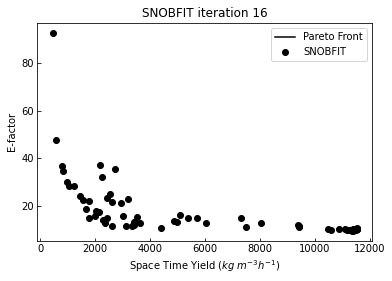

In [7]:
lab.reset()

# Set up the SNOBFIT strategy
transform = MultitoSingleObjective(lab.domain, 
                                   expression='-sty/1e4+e_factor/100', 
                                   maximize=False)
snobfit = SNOBFIT(lab.domain, transform=transform)

names = [r'Space Time Yield ($kg \; m^{-3} h^{-1}$)', 'E-factor']
results= None
prev_param = None

# Run SNOBFIT
print("Running SNOBFIT iteration 1")
for i in range(16):
    # Get SNOBFIT suggestions
    experiments, _, _, prev_param = snobfit.suggest_experiments(5, 
                                                               prev_res=results,
                                                               prev_param=prev_param)
    
    # Run experiments
    results = lab.run_experiments(experiments)
    
    clear_output(wait=True) # Clear the previous plot
    fig, ax = lab.pareto_plot()
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    ax.set_title(f"SNOBFIT iteration {i+1}")
    ax.set_yscale('log')
    ax.tick_params(direction='in')
    plt.show(fig)
    print(f"Running SNOBFIT iteration {i+2}")
    

# Make final plot
clear_output(wait=True)
fig, ax = lab.pareto_plot()
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title(f"SNOBFIT iteration {i+1}")
ax.tick_params(direction='in')
plt.show(fig)

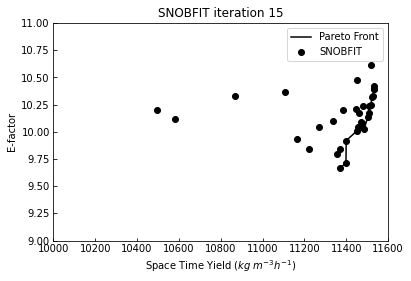

In [8]:
# Just showing the pareto front
clear_output(wait=True)
fig, ax = lab.pareto_plot()
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title(f"SNOBFIT iteration {i}")
ax.set_ylim(9, 11)
ax.set_xlim(1e4, 1.16e4)
ax.tick_params(direction='in')
plt.show(fig)

In [42]:
data = lab.data[['sty', 'e_factor']].copy()
f = lambda a: -1.0*a
data[('e_factor', 'DATA')] = data[['e_factor']].apply(f)
ref = data.max(axis=0).to_numpy()
points, _ = pareto_efficient(data.data_to_numpy(),maximize=True)
HvI.hypervolume(points, ref=ref)

49.36590751190202